In [19]:
from cgi import test
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as sllm
from sklearn.linear_model import LinearRegression




In [3]:
data = np.loadtxt('YearPredictionMSD.txt',delimiter=',')



1995.4964384111645 1995.5015921362315 1995.5366339923576


(array([  216.,   175.,   241.,  1587.,  5706., 15872., 21831., 48847.,
        96964., 97477.]),
 array([1922. , 1930.9, 1939.8, 1948.7, 1957.6, 1966.5, 1975.4, 1984.3,
        1993.2, 2002.1, 2011. ]),
 <BarContainer object of 10 artists>)

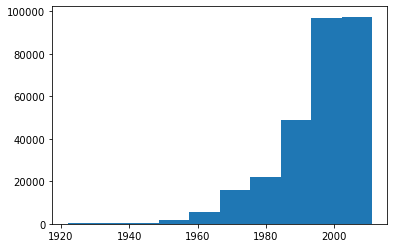

In [5]:
mask = data[:,0] >= 2000
A = data[np.invert(mask)]
B = data[mask]
B_prime , _ = train_test_split(B, test_size=0.5)
data = np.vstack((A,B_prime))

# Split the dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2)
test_data, val_data = train_test_split(test_data, test_size=0.5)

# Separate the features and target variable in the train set
X_train = train_data[:, 1:]  # Exclude the first column (year)
y_train = train_data[:, 0]  # First column is the year

# Separate the features and target variable in the test set
X_test = test_data[:, 1:]
y_test = test_data[:, 0]

X_val = val_data[:,1:]
y_val = val_data[:,0]

print(np.mean(y_train),np.mean(y_val),np.mean(y_test))
plt.hist(y_train)


In [6]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [14]:
param_grid = {
    'C':[0.1,1,50,100],
    'max_iter':[1000]
}
model = sllm.LogisticRegression()
grid_search = GridSearchCV(model,param_grid,scoring='accuracy',n_jobs=-1,cv=2)
grid_search.fit(X_test_scaled,y_test)

best_model = grid_search.best_estimator_
best_param = grid_search.best_params_

print(best_param)

C:\Users\ApsaraFite\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


{'C': 0.1, 'max_iter': 1000}


In [15]:
best_model.fit(X_train_scaled,y_train)



LogisticRegression(C=0.1, max_iter=1000)

Best R2 score:  -0.04968721950546584


Text(0, 0.5, 'Predicted')

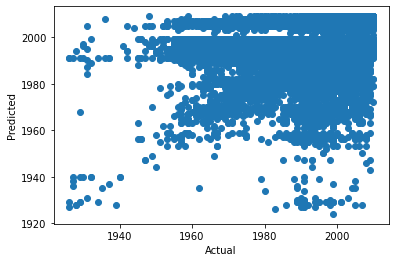

In [16]:
y_pred = best_model.predict(X_test_scaled)
r2 = r2_score(y_test,y_pred)

print("Best R2 score: ",r2)
print("Mean squared error:",mean_squared_error(y_test,y_pred))

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Best R2 score:  0.24239230269038448
Mean squared error: 104.32321415906253


Text(0, 0.5, 'Predicted')

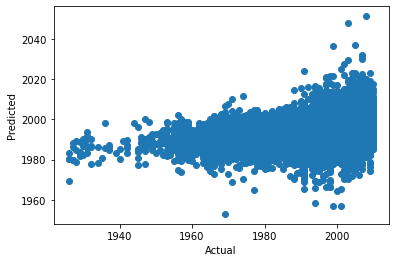

In [20]:
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)

r2 = r2_score(y_test,y_pred)
print("Best R2 score: ",r2)
print("Mean squared error:",mean_squared_error(y_test,y_pred))

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')